In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.display import display, HTML, IFrame
import folium
from folium.plugins import MarkerCluster
import time

In [14]:
zomato_df = pd.read_csv(r"C:\Users\hp\Downloads\zomato_data.csv")
zomato_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
geo_df = pd.read_csv(r"C:\Users\hp\Downloads\Geographical Coordinates.csv")
geo_df.head()

,listed_incity,Latitude,Longitude
0,Banashankari,12.939333,77.553982
1,Bannerghatta Road,12.952660,77.605048
2,Basavanagudi,12.941726,77.575502
3,Bellandur,12.925352,77.675941
4,Brigade Road,12.967358,77.606435


## Step 1: Rating Column (rate)

In [15]:
zomato_df['rate'] = zomato_df['rate'].replace('-', np.nan)

zomato_df['rate'] = zomato_df['rate'].astype(str)

zomato_df['rate'] = zomato_df['rate'].str.replace('/5', '', regex=False)

zomato_df['rate'] = pd.to_numeric(zomato_df['rate'], errors='coerce')

zomato_df['rate'] = zomato_df['rate'].fillna(zomato_df['rate'].median())

zomato_df['rate'].describe()

count    51717.000000
mean         3.700362
std          0.395391
min          1.800000
25%          3.500000
50%          3.700000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

In [16]:
zomato_df['rate'].isnull().sum()

0

## Step 2: Cost Column (approx_costfor_two_people)

In [17]:
zomato_df['approx_costfor_two_people'] = zomato_df['approx_costfor_two_people'].astype(str).str.replace(',', '')

zomato_df['approx_costfor_two_people'] = pd.to_numeric(zomato_df['approx_costfor_two_people'], errors='coerce')

zomato_df['approx_costfor_two_people'] = zomato_df['approx_costfor_two_people'].fillna(zomato_df['approx_costfor_two_people'].median())

zomato_df['approx_costfor_two_people'].describe()

count    51717.000000
mean       554.391689
std        437.563723
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_costfor_two_people, dtype: float64

In [18]:
zomato_df['approx_costfor_two_people'].isnull().sum()

0

## Step 3: Categorical Columns

In [19]:
zomato_df['dish_liked'] = zomato_df['dish_liked'].fillna("Not Available")

zomato_df['cuisines'] = zomato_df['cuisines'].fillna("Other")

zomato_df['rest_type'] = zomato_df['rest_type'].fillna("Unknown")

zomato_df[['dish_liked', 'cuisines', 'rest_type']].isnull().sum()

dish_liked    0
cuisines      0
rest_type     0
dtype: int64

## Step 4: Votes Column

In [20]:
zomato_df['votes'] = zomato_df['votes'].fillna(zomato_df['votes'].median())

zomato_df['votes'].describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

In [21]:
zomato_df['votes'].isnull().sum()

0

## Step 5: Binary Encoding


In [22]:
zomato_df['online_order'] = zomato_df['online_order'].map({'Yes': 1, 'No': 0})

zomato_df['book_table'] = zomato_df['book_table'].map({'Yes': 1, 'No': 0})

zomato_df[['online_order', 'book_table']].head()

,online_order,book_table
0,1,1
1,1,0
2,1,0
3,0,0
4,0,0


##  Step 6: Data Type Conversion

In [23]:
zomato_df['rate'] = zomato_df['rate'].astype(float)

zomato_df['votes'] = zomato_df['votes'].astype(int)

zomato_df['approx_costfor_two_people'] = zomato_df['approx_costfor_two_people'].astype(int)

zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 3.6+ MB


# Task1 (Description) - Apply Exploratory Data Analysis and answer the questions which were shared with you in google form.

## Performing EDA on Zomato DF

### Checking for missing values

In [24]:
zomato_df.isnull().sum()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
dtype: int64

### Checking for duplicates

In [32]:
zomato_df.duplicated().sum()

957

In [33]:
zomato_df = zomato_df.drop_duplicates()
zomato_df.duplicated().sum()

0

In [34]:
zomato_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


### Checking the shape

In [35]:
zomato_df.shape

(50760, 10)

### Checking the datatypes


In [36]:
zomato_df.dtypes

online_order                   int64
book_table                     int64
rate                         float64
votes                          int32
rest_type                     object
dish_liked                    object
cuisines                      object
approx_costfor_two_people      int32
listed_intype                 object
listed_incity                 object
dtype: object

### Checking the description Statistics 

In [37]:
zomato_df.describe()

,online_order,book_table,rate,votes,approx_costfor_two_people
count,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000
mean,0.595548,0.126399,3.700280,288.016824,558.833235
std,0.490791,0.332301,0.398591,809.131473,439.228106
min,0.000000,0.000000,1.800000,0.000000,40.000000
25%,0.000000,0.000000,3.500000,7.000000,300.000000
50%,1.000000,0.000000,3.700000,43.000000,400.000000
75%,1.000000,0.000000,3.900000,203.000000,700.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


### Univariate Analysis (Numerical Columns)

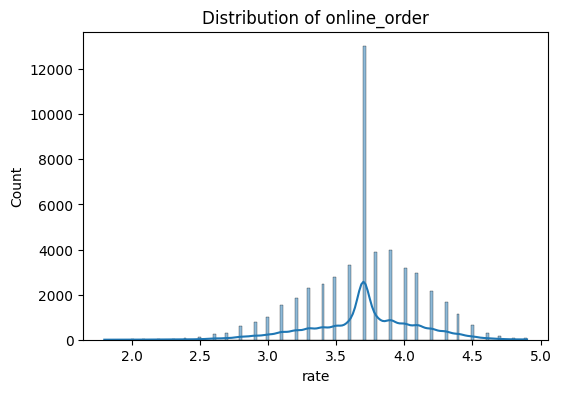

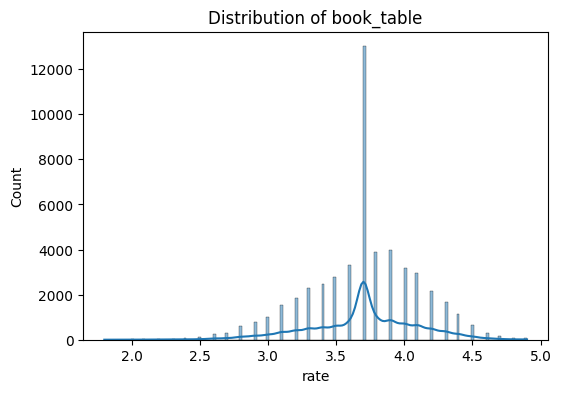

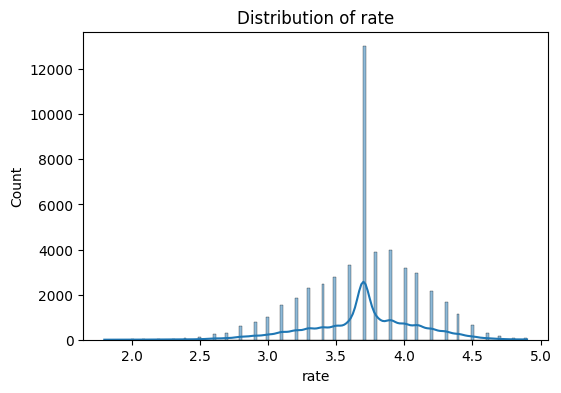

In [40]:
for col in zomato_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(zomato_df[column], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Univariate Analysis (Categorical Columns)

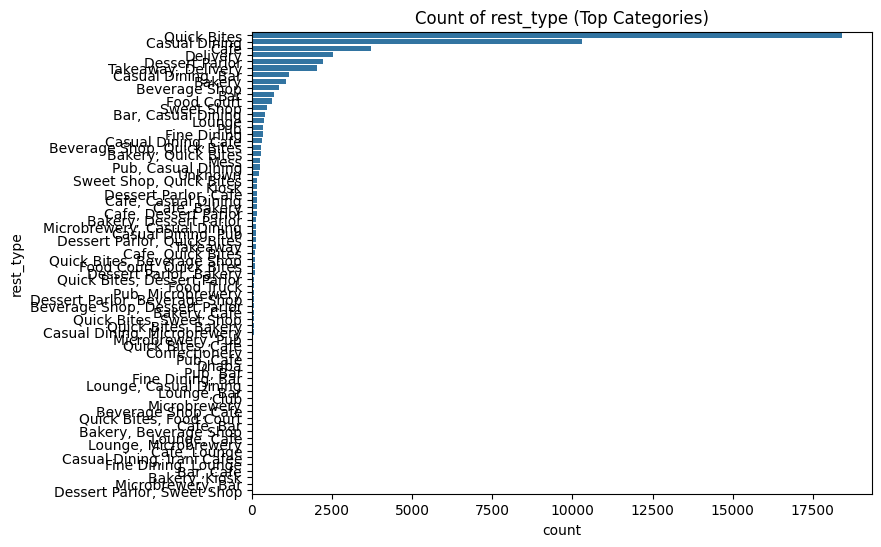

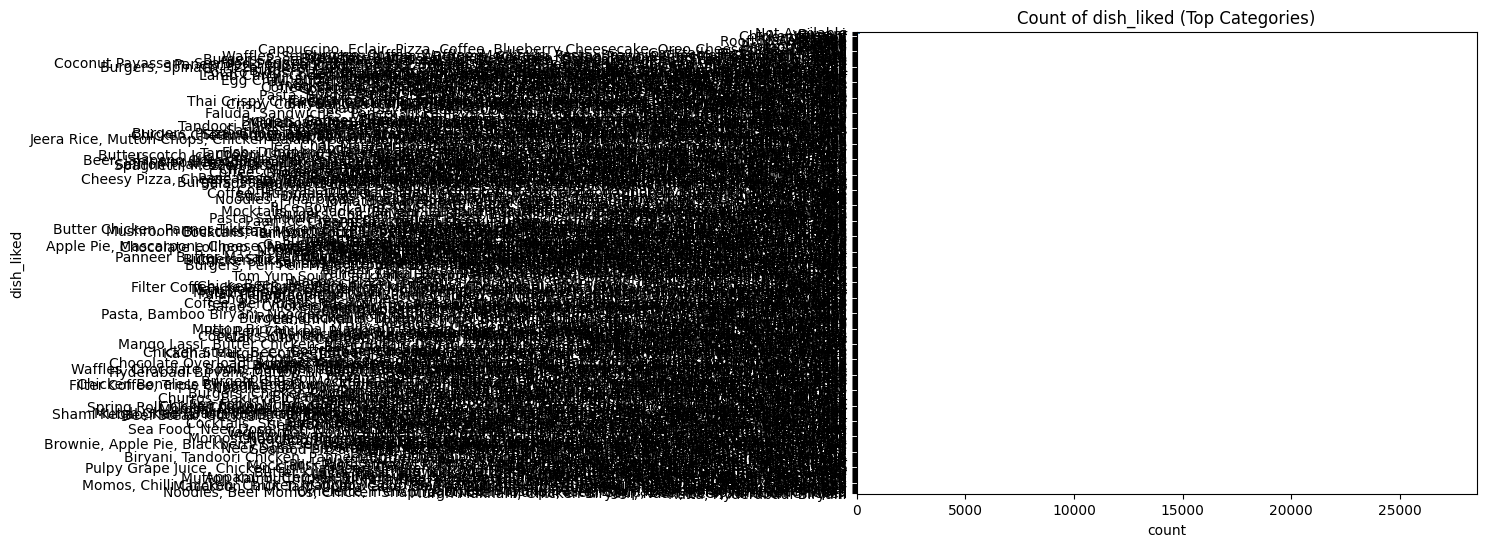

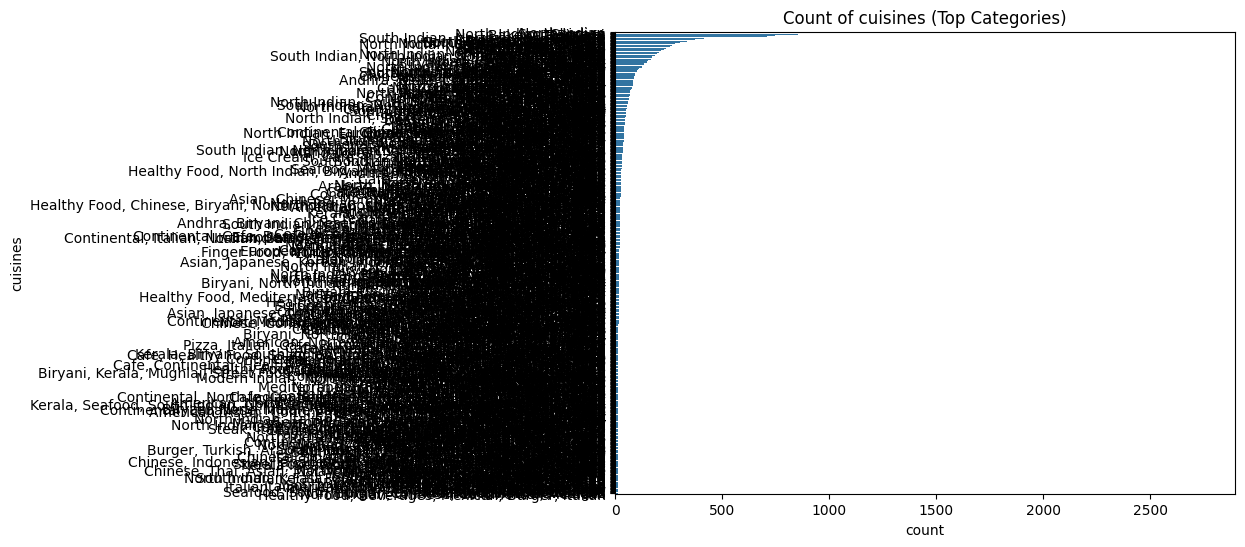

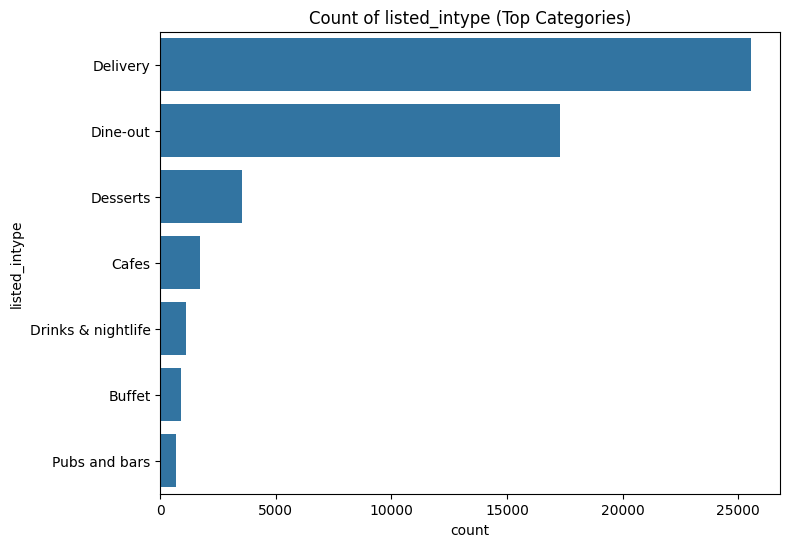

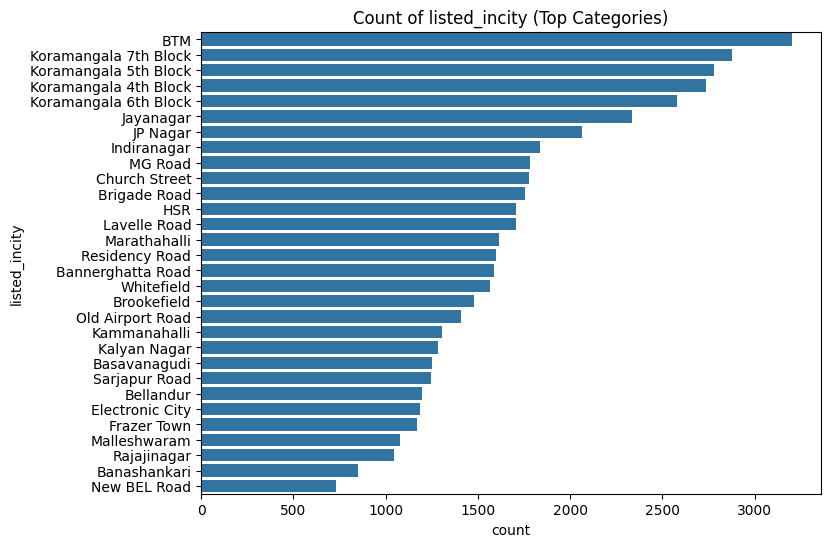

In [44]:
cat_cols  = zomato_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    count = zomato_df[col].value_counts()
    threshold = 10
    top = count[count > threshold]
    if len(top) > 0:
        plt.figure(figsize=(8, 6))
        sns.countplot(y=zomato_df[col], order=top.index)
        plt.title(f'Count of {col} (Top Categories)')
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(y=zomato_df[col])
        plt.title(f'Count of {col}')
        plt.show()

## Bivariate Analysis (Price vs Rating)

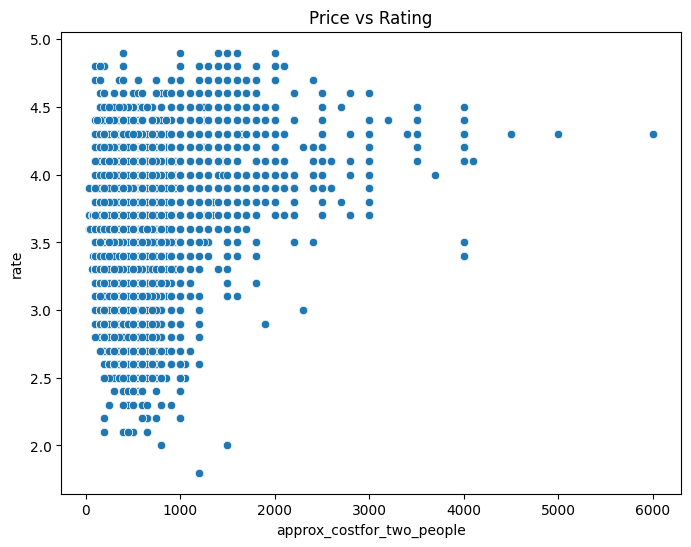

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='approx_costfor_two_people', y='rate', data=zomato_df)
plt.title('Price vs Rating')
plt.show()

### Key Insights:
+ Most restaurants lie in the ₹200–₹2000 price range.

+ Ratings cluster between 3.0 and 4.5 across all price points.

+ No strong pattern – higher price doesn't guarantee higher rating.

+ Some low-cost restaurants (< ₹500) have very high ratings (4.5+)

### Multivariate Analysis

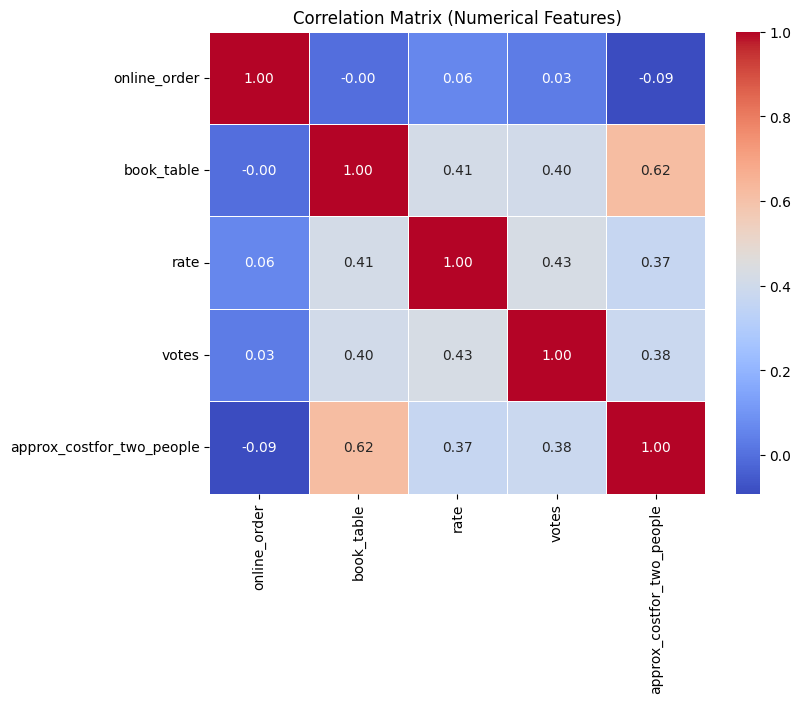

In [48]:
corr = zomato_df.select_dtypes(include=['int64', 'float64', 'int32']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

### Key Insights:
+ book_table and approx_costfor_two_people have a strong positive correlation (0.62) – costlier restaurants are more likely to offer table booking.

+ rate and votes show a moderate correlation (0.43) – better-rated restaurants tend to receive more votes.

+ book_table and rate are positively correlated (0.41) – restaurants with table booking generally have higher ratings.

+ votes and approx_costfor_two_people have a slight positive correlation (0.38) – expensive restaurants may attract more customer votes.

+ online_order has almost no correlation with any other feature (values near 0) – it operates independently of cost, rating, votes, and booking.

##  Dataset Merging for Mapping

In [50]:
merged_df = pd.merge(zomato_df, geo_df, on='listed_incity', how='left')

merged_df

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,12.939333,77.553982
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,12.939333,77.553982
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,12.939333,77.553982
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,12.939333,77.553982
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,12.939333,77.553982
...,...,...,...,...,...,...,...,...,...,...,...,...
50755,0,0,3.6,27,Bar,Not Available,Continental,1500,Pubs and bars,Whitefield,NaN,NaN
50756,0,0,3.7,0,Bar,Not Available,Finger Food,600,Pubs and bars,Whitefield,NaN,NaN
50757,0,0,3.7,0,Bar,Not Available,Finger Food,2000,Pubs and bars,Whitefield,NaN,NaN
50758,0,1,4.3,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,Pubs and bars,Whitefield,NaN,NaN


In [51]:
merged_df.isnull().sum()

online_order                    0
book_table                      0
rate                            0
votes                           0
rest_type                       0
dish_liked                      0
cuisines                        0
approx_costfor_two_people       0
listed_intype                   0
listed_incity                   0
Latitude                     5459
Longitude                    5459
dtype: int64

In [52]:
merged_df.duplicated().sum()

0

In [88]:
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])
merged_df.isnull().sum()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
Latitude                     0
Longitude                    0
dtype: int64

## Google Form Questions with Answers

### 1. What is the shape of the given dataset? (After removing 957 duplicates)

In [56]:
zomato_df.shape 

(50760, 10)

### 2. How many restaurants serve North Indian cuisine? (After removing 957 duplicates)

In [58]:
north = zomato_df[zomato_df['cuisines'].str.contains('North Indian', case=False, na=False)].shape[0]
north

20719

### 3. What cuisine is most commonly offered by restaurants in Bangalore?


In [61]:
cuisine_lst = zomato_df['cuisines'].dropna().str.split(',')

all_cuisine = [cuisine.strip() for sub in cuisine_lst for cuisine in sub]

common = pd.Series(all_cuisine).mode()[0]

common

'North Indian'

### 4. Which locality in Bangalore has the highest average cost for dining (for two people)?

In [62]:
avg = zomato_df.groupby('listed_incity')['approx_costfor_two_people'].mean()

highest = avg.idxmax()

highest

'Church Street'

###  5. Which restaurant type has the top rating with over 1000 votes?


In [64]:
above_1K = zomato_df[zomato_df['votes'] > 1000]

top = above_1K.loc[above_1K['rate'].idxmax()]['rest_type']

top

'Microbrewery'

###  6. How much does it cost at minimum to eat out in Bangalore?


In [67]:
minimum = zomato_df['approx_costfor_two_people'].min()

minimum

40

### 7. What percentage of total online orders is received by restaurants in Banashankari?

In [71]:
total = zomato_df['online_order'].sum()

banashankari = zomato_df[zomato_df['listed_incity'] == 'Banashankari']['online_order'].sum()

pct = (banashankari / total) * 100

pct

1.8028448561032089

### 8. Which locality has the most restaurants with over 500 votes and a rating below 3.0?

In [73]:
reduced = zomato_df[(zomato_df['votes'] > 500) & (zomato_df['rate'] < 3.0)]

count = reduced['listed_incity'].value_counts()

most = count.idxmax()

most

'Brookefield'

### 9. Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?

In [75]:
unq = zomato_df.groupby('listed_incity')['rest_type'].nunique()

highest = unq.idxmax()

highest

'BTM'

### 10. What's the average cost difference between buffet and delivery restaurants?

In [77]:
buffet = zomato_df[zomato_df['listed_intype'] == 'Buffet']
delivery = zomato_df[zomato_df['listed_intype'] == 'Delivery']

avg_buffet = buffet_restaurants['approx_costfor_two_people'].mean()
avg_delivery = delivery_restaurants['approx_costfor_two_people'].mean()

diff = avg_buffet - avg_delivery

diff

829.2585459669299

### 11 . What is the maximum number of votes received by any restaurant with online ordering?

In [79]:
online = zomato_df[zomato_df['online_order'] == 1]

maximum = online['votes'].max()

maximum

16832

### 12. What is the average rating of restaurants that serve both North Indian and Chinese cuisines?

In [81]:
north = zomato_df[zomato_df['cuisines'].str.contains('North Indian') & zomato_df['cuisines'].str.contains('Chinese')]

avg = north['rate'].mean()

avg

3.590440128296508

### 13. What is the most profitable area for Zomato based on potential revenue estimation?
### HINT: strike rate = (Total Runs / Total Balls Faced) * 100

In [82]:
online = zomato_df[zomato_df['online_order'] == 1]

rev = online.groupby('listed_incity').agg(total = ('online_order', 'sum'), avg =('approx_costfor_two_people', 'mean'), num = ('rest_type', 'count'))

rev['revenue_score'] = (rev['total'] * rev['avg']) / rev['num'] * 100

highest = rev['revenue_score'].idxmax()

highest 

'Lavelle Road'

### 14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?

In [84]:
comp = zomato_df.groupby('rest_type').agg(avg_rating = ('rate', 'mean'),avg_votes = ('votes', 'mean'))

comp = comp.sort_values(by='avg_rating')

least = rest_type_complaints.index[0]

least

'Dessert Parlor, Kiosk'

### 15. In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?

In [87]:
red = zomato_df[(zomato_df['rate'] > 4.2) & (zomato_df['votes'] > 500) & (zomato_df['online_order'] == 1)]

vals = red['listed_incity'].value_counts()

best = vals.idxmax()

best

'Koramangala 7th Block'

# Task2 (Description) - Create Cuisine-Specific Mapping using Folium Library:

### Filtering the Data


In [89]:
italian_df = merged_df[merged_df['cuisines'].str.contains("Italian", case=False, na=False)]
italian_df

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,Latitude,Longitude
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,12.939333,77.553982
7,1,1,4.6,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes,Banashankari,12.939333,77.553982
8,1,0,4.0,324,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,Cafes,Banashankari,12.939333,77.553982
9,1,0,4.2,504,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari,12.939333,77.553982
11,1,1,4.2,150,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,Cafes,Banashankari,12.939333,77.553982
...,...,...,...,...,...,...,...,...,...,...,...,...
45258,0,1,4.1,597,Bar,"Margarita, Masala Peanuts, Cocktails, Momos, P...","Continental, North Indian, Italian",1300,Pubs and bars,Old Airport Road,12.960632,77.642500
45271,0,1,4.4,2861,"Bar, Casual Dining","Pizza, Chocolate Cake, Cocktails, Nachos, Sang...","Continental, Asian, Italian, North Indian",1500,Pubs and bars,Old Airport Road,12.960632,77.642500
45280,1,1,4.1,1857,"Casual Dining, Bar","Pizza, Cocktails, Pasta, Mushroom Soup, Panna ...","Italian, Seafood, American, Continental",1100,Pubs and bars,Old Airport Road,12.960632,77.642500
45285,0,1,4.0,988,"Bar, Casual Dining","Bbq Chicken Pizza, Sangria, Cocktails, Beer, M...","Continental, Chinese, Italian",1400,Pubs and bars,Old Airport Road,12.960632,77.642500


### Creating the Map


In [90]:
bangalore_coords = [12.9716, 77.5946]
m = folium.Map(location=bangalore_coords, zoom_start=12)

### Adding Restaurant Markers

In [91]:
for _, row in italian_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>City:</b> {row['listed_incity']}<br><b>Cuisines:</b> {row['cuisines']}",
        icon=folium.Icon(color='purple')
    ).add_to(m)

### Showing Restaurant Details


In [92]:
for _, row in italian_df.iterrows():
    popup_text = f"""
    <b>City:</b> {row['listed_incity']}<br>
    <b>Cuisines:</b> {row['cuisines']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='purple')
    ).add_to(m)

### Saving the Map

In [93]:
for i, row in italian_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>City:</b> {row['listed_incity']}<br><b>Cuisines:</b> {row['cuisines']}",
        icon=folium.Icon(color='purple')
    ).add_to(m)
m.save("italian_spots_map.html")

### Displaying the Map

In [94]:
IFrame("italian_spots_map.html", width = 1000, height = 800)

# Task3 (Description) - Interactive Density Mapping using Folium

In [96]:
m1 = folium.Map(location = [12.9716, 77.5946], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m1)

for i, row in merged_df.iterrows():
    popup_text = f"""
    <b>City:</b> {row['listed_incity']}<br>
    <b>Rating:</b> {row['rate']}<br>
    <b>Approx Cost for Two:</b> ₹{row['approx_costfor_two_people']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
    ).add_to(marker_cluster)

m1.save("restaurant_density.html")

### Displaying the Map

In [97]:
IFrame("restaurant_density.html", width = 1000, height = 800)